# USA Maple Syrup 2000-2021 Sales Analysis

Link to dataset: https://www.kaggle.com/datasets/datasciencedonut/maple-syrup-production-in-the-usa-2000-2021?resource=download

### Goals

The goals for this project include:
* Exploring the dataset to find faults in dataset
* Cleaning and wrangling the dataset so it can be used for analysis
* Analyze production and price over time
* Create a prediction for expected production and price in 2022


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
maple_syrup_data = pd.read_csv('Domestic_Maple_Syrup_Production_2000-2021.csv')

## Data Exploration

In [3]:
maple_syrup_data.head(10)

,State,Num_of_Taps,Yield_per_Tap,Production,Avg_Price,Value,Retail_Price,Wholesale_Price,Bulk_P_Price,Bulk_G_Price,Date_Open,Date_Closed,Year
0,Maine,1960,0.262,514,38.6,19840,61.4,48.30,3.20,35.10,2/15/2021,4/30/2021,2021
1,Michigan,550,0.273,150,46.3,6945,47.7,37.60,2.40,26.80,2/1/2021,4/14/2021,2021
2,New Hampshire,530,0.240,127,64.9,8242,65.5,48.20,2.40,26.40,1/11/2021,4/16/2021,2021
3,New York,2900,0.223,647,37.8,24457,45.6,41.50,2.40,26.70,1/1/2021,5/4/2021,2021
4,Pennsylvania,745,0.226,168,36.2,6082,41.3,39.80,2.50,27.60,1/4/2021,4/15/2021,2021
5,Vermont,6500,0.269,1750,32.0,56000,46.3,37.90,2.60,28.30,1/25/2021,4/23/2021,2021
6,Wisconsin,900,0.406,365,33.1,12082,45.2,40.70,2.50,27.40,2/20/2021,4/10/2021,2021
7,Maine,1970,0.299,590,34.9,20591,53.0,61.40,2.26,24.90,2/2/2020,5/5/2020,2020
8,Michigan,570,0.298,170,48.6,8262,48.5,47.70,2.00,21.70,2/2/2020,4/25/2020,2020
9,New Hampshire,530,0.291,154,52.1,8023,58.0,65.50,2.05,22.60,1/5/2020,4/28/2020,2020


In [4]:
maple_syrup_data.describe()

,Num_of_Taps,Yield_per_Tap,Avg_Price,Retail_Price,Year
count,220.000000,220.000000,220.000000,220.000000,220.000000
mean,993.081818,0.224750,40.539091,42.351818,2010.377273
std,1188.199694,0.061349,11.734254,9.115782,6.200488
min,51.000000,0.083000,14.200000,27.600000,2000.000000
25%,353.750000,0.173750,32.275000,34.375000,2005.000000
50%,470.000000,0.223500,38.450000,41.700000,2010.500000
75%,1415.500000,0.264500,46.900000,47.775000,2016.000000
max,6500.000000,0.410000,87.200000,68.000000,2021.000000


In [5]:
maple_syrup_data.info()

# Data types for production and value shown as objects, should change to numeric data type
# There seems to be some missing values for date open and closed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            220 non-null    object 
 1   Num_of_Taps      220 non-null    int64  
 2   Yield_per_Tap    220 non-null    float64
 3   Production       220 non-null    object 
 4   Avg_Price        220 non-null    float64
 5   Value            220 non-null    object 
 6   Retail_Price     220 non-null    float64
 7   Wholesale_Price  220 non-null    object 
 8   Bulk_P_Price     220 non-null    object 
 9   Bulk_G_Price     220 non-null    object 
 10  Date_Open        130 non-null    object 
 11  Date_Closed      130 non-null    object 
 12  Year             220 non-null    int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 22.5+ KB


In [6]:
maple_syrup_data.isnull().sum()

State               0
Num_of_Taps         0
Yield_per_Tap       0
Production          0
Avg_Price           0
Value               0
Retail_Price        0
Wholesale_Price     0
Bulk_P_Price        0
Bulk_G_Price        0
Date_Open          90
Date_Closed        90
Year                0
dtype: int64

## Data Cleaning

In [7]:
# Change all column names to lowercase for ease of use

maple_syrup_data.columns = maple_syrup_data.columns.str.lower()

maple_syrup_data.columns

Index(['state', 'num_of_taps', 'yield_per_tap', 'production', 'avg_price',
       'value', 'retail_price', 'wholesale_price', 'bulk_p_price',
       'bulk_g_price', 'date_open', 'date_closed', 'year'],
      dtype='object')

In [8]:
maple_syrup_data.wholesale_price.unique()

# Looking at raw data, bulk p and g prices are sometimes shown as (D), which is why the data types are objects.
# Source of data set states that this data is withheld to avoid disclosing data for individual operations.

array(['48.30', '37.60', '48.20', '41.50', '39.80', '37.90', '40.70',
       '61.40', '47.70', '65.50', '45.60', '41.30', '46.30', '45.20',
       '47.50', '42.90', '42.40', '39.10', '39.90', '42.60', '53.60',
       '32.80', '43.60', '45.00', '47.30', '37.40', '40.20', '29.80',
       '38.80', '(D)', '43.80', '42.7', '48.4', '44.2', '43', '46.9',
       '44.9', '46', '39.5', '29.7', '40.1', '50', '39.4', '56.6', '42.3',
       '48.5', '43.6', '41.8', '45.1', '46.8', '42.9', '40.4', '40',
       '59.1', '39.2', '37', '38.5', '40.2', '42', '36.4', '49.4', '46.4',
       '37.4', '42.4', '41.5', '31.5', '39.3', '35.7', '53.8', '44',
       '46.1', '34', '39.1', '34.5', '56.9', '40.8', '36.8', '37.9',
       '43.8', '37.2', '40.5', '36.2', '45.7', '33.8', '38.7', '37.5',
       '36', '35.9', '40.3', '59', '34.1', '40.7', '34.3', '37.3', '46.3',
       '41.9', '35.4', '40.6', '38.3', '32.2', '38.4', '42.2', '30.7',
       '38.6', '32.5', '34.6', '38.1', '35.5', '32.8', '29.5', '30.6',
     

In [9]:
# To change the data types, first replace (D) with NaN

maple_syrup_data.wholesale_price = maple_syrup_data.wholesale_price.replace('[(D)]', np.NaN, regex=True)
maple_syrup_data.bulk_p_price = maple_syrup_data.bulk_p_price.replace('[(D)]', np.NaN, regex=True)
maple_syrup_data.bulk_g_price = maple_syrup_data.bulk_g_price.replace('[(D)]', np.NaN, regex=True)

maple_syrup_data.head()

,state,num_of_taps,yield_per_tap,production,avg_price,value,retail_price,wholesale_price,bulk_p_price,bulk_g_price,date_open,date_closed,year
0,Maine,1960,0.262,514,38.6,19840,61.4,48.30,3.20,35.10,2/15/2021,4/30/2021,2021
1,Michigan,550,0.273,150,46.3,6945,47.7,37.60,2.40,26.80,2/1/2021,4/14/2021,2021
2,New Hampshire,530,0.240,127,64.9,8242,65.5,48.20,2.40,26.40,1/11/2021,4/16/2021,2021
3,New York,2900,0.223,647,37.8,24457,45.6,41.50,2.40,26.70,1/1/2021,5/4/2021,2021
4,Pennsylvania,745,0.226,168,36.2,6082,41.3,39.80,2.50,27.60,1/4/2021,4/15/2021,2021


In [10]:
# Need to remove the comma from the values to convert the numbers to float

maple_syrup_data.value = maple_syrup_data.value.replace('[,]', '', regex=True)
maple_syrup_data.production = maple_syrup_data.production.replace('[,]', '', regex=True)

# Convert data types to numeric

maple_syrup_data[['production', 'value', 'wholesale_price', 'bulk_p_price', 'bulk_g_price']] = maple_syrup_data[['production', 'value', 'wholesale_price', 'bulk_p_price', 'bulk_g_price']].apply(pd.to_numeric)

maple_syrup_data.dtypes

state               object
num_of_taps          int64
yield_per_tap      float64
production           int64
avg_price          float64
value                int64
retail_price       float64
wholesale_price    float64
bulk_p_price       float64
bulk_g_price       float64
date_open           object
date_closed         object
year                 int64
dtype: object

In [11]:
# Change date open and closed to datetime

maple_syrup_data['date_open'] = pd.to_datetime(maple_syrup_data['date_open'])
maple_syrup_data['date_closed'] = pd.to_datetime(maple_syrup_data['date_closed'])

maple_syrup_data.head()

,state,num_of_taps,yield_per_tap,production,avg_price,value,retail_price,wholesale_price,bulk_p_price,bulk_g_price,date_open,date_closed,year
0,Maine,1960,0.262,514,38.6,19840,61.4,48.3,3.2,35.1,2021-02-15,2021-04-30,2021
1,Michigan,550,0.273,150,46.3,6945,47.7,37.6,2.4,26.8,2021-02-01,2021-04-14,2021
2,New Hampshire,530,0.240,127,64.9,8242,65.5,48.2,2.4,26.4,2021-01-11,2021-04-16,2021
3,New York,2900,0.223,647,37.8,24457,45.6,41.5,2.4,26.7,2021-01-01,2021-05-04,2021
4,Pennsylvania,745,0.226,168,36.2,6082,41.3,39.8,2.5,27.6,2021-01-04,2021-04-15,2021


In [12]:
# Convert state names to strings

maple_syrup_data['state'] = maple_syrup_data['state'].astype('string')

In [13]:
maple_syrup_data.dtypes

state                      string
num_of_taps                 int64
yield_per_tap             float64
production                  int64
avg_price                 float64
value                       int64
retail_price              float64
wholesale_price           float64
bulk_p_price              float64
bulk_g_price              float64
date_open          datetime64[ns]
date_closed        datetime64[ns]
year                        int64
dtype: object

## Summary Statistics 

In [14]:
# Another look at some summary statistics with correct data types

maple_syrup_data.describe()

,num_of_taps,yield_per_tap,production,avg_price,value,retail_price,wholesale_price,bulk_p_price,bulk_g_price,year
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,214.000000,209.000000,209.000000,220.000000
mean,993.081818,0.224750,257.309091,40.539091,8827.763636,42.351818,36.673832,2.210957,23.720574,2010.377273
std,1188.199694,0.061349,380.714295,11.734254,11698.718741,9.115782,8.271432,0.543005,7.411635,6.200488
min,51.000000,0.083000,6.000000,14.200000,290.000000,27.600000,21.300000,1.000000,1.050000,2000.000000
25%,353.750000,0.173750,60.000000,32.275000,2195.250000,34.375000,29.000000,1.800000,19.600000,2005.000000
50%,470.000000,0.223500,115.000000,38.450000,4795.000000,41.700000,37.350000,2.300000,25.200000,2010.500000
75%,1415.500000,0.264500,265.000000,46.900000,8789.250000,47.775000,42.375000,2.650000,29.200000,2016.000000
max,6500.000000,0.410000,2070.000000,87.200000,59700.000000,68.000000,65.500000,3.500000,38.400000,2021.000000


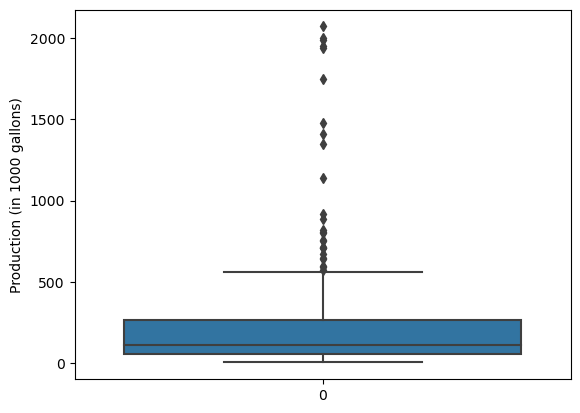

In [15]:
plt.figure()

sns.boxplot(maple_syrup_data['production'])
plt.ylabel('Production (in 1000 gallons)')

plt.show()

# There doesn't seem to be any major anomalies for production, range is large (range of 0-2,000,000 gallons)
# There is a positive skew, showing that most of the maple syrup is produced in a small number of states

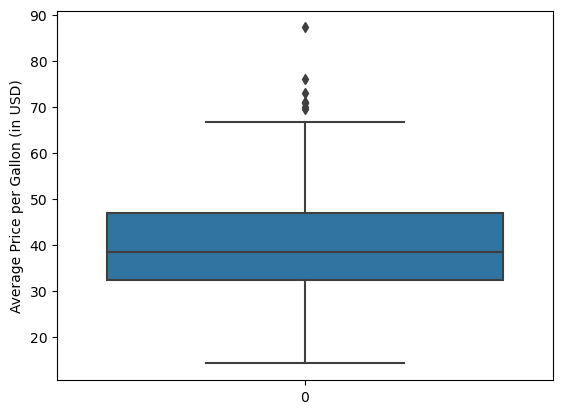

In [16]:
plt.figure()

sns.boxplot(maple_syrup_data['avg_price'])
plt.ylabel('Average Price per Gallon (in USD)')

plt.show()

# There is a data point showing at around 88 USD, will be further explored in the analysis
# No significant skew, showing that prices are fairly stable, need to be explored over time

In [17]:
maple_syrup_data['state'].value_counts()

# Seems like some states stop production at certain points

Maine            22
Michigan         22
New Hampshire    22
New York         22
Pennsylvania     22
Vermont          22
Wisconsin        22
Connecticut      19
Massachusetts    19
Ohio             19
Indiana           3
Minnesota         3
West Virginia     3
Name: state, dtype: Int64

## Data Analysis

The goal of the analysis is to estimate the expected production value per tap in 2022 for the major maple syrup producing states in the USA. First, the states that produce the majority of maple syrup will be identified to confirm that the major production states are Vermont, Maine and New York. Following, the yield per tap growth over time will be explored to see if there is a strong correlation and if we can predict what it will look like in 2022. Lastly, the average price over time will be used to estimate what the value of a tap will be in 2022.

### Production by Regions
The purpose of this section is to pinpoint the major maple syrup producing states in the USA. These states will be grouped and isolated from the rest of the data to remove minor producers. This is to focus the scope and remove outliers such as low producing states, states that have only produced for a limited timespan and states that may be unsuitable for mass production of maple syrup.

In [18]:
maple_syrup_data.head(20)

,state,num_of_taps,yield_per_tap,production,avg_price,value,retail_price,wholesale_price,bulk_p_price,bulk_g_price,date_open,date_closed,year
0,Maine,1960,0.262,514,38.6,19840,61.4,48.3,3.20,35.1,2021-02-15,2021-04-30,2021
1,Michigan,550,0.273,150,46.3,6945,47.7,37.6,2.40,26.8,2021-02-01,2021-04-14,2021
2,New Hampshire,530,0.240,127,64.9,8242,65.5,48.2,2.40,26.4,2021-01-11,2021-04-16,2021
3,New York,2900,0.223,647,37.8,24457,45.6,41.5,2.40,26.7,2021-01-01,2021-05-04,2021
4,Pennsylvania,745,0.226,168,36.2,6082,41.3,39.8,2.50,27.6,2021-01-04,2021-04-15,2021
5,Vermont,6500,0.269,1750,32.0,56000,46.3,37.9,2.60,28.3,2021-01-25,2021-04-23,2021
6,Wisconsin,900,0.406,365,33.1,12082,45.2,40.7,2.50,27.4,2021-02-20,2021-04-10,2021
7,Maine,1970,0.299,590,34.9,20591,53.0,61.4,2.26,24.9,2020-02-02,2020-05-05,2020
8,Michigan,570,0.298,170,48.6,8262,48.5,47.7,2.00,21.7,2020-02-02,2020-04-25,2020
9,New Hampshire,530,0.291,154,52.1,8023,58.0,65.5,2.05,22.6,2020-01-05,2020-04-28,2020


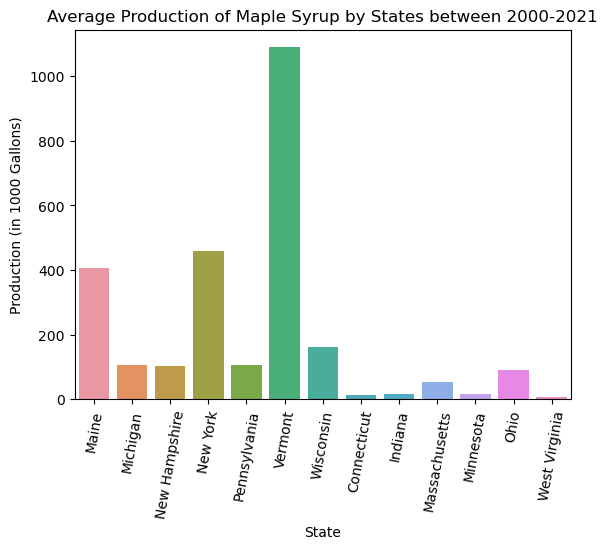

In [19]:
plt.figure()

sns.barplot(x=maple_syrup_data['state'], y=maple_syrup_data['production'], errorbar=None)
plt.title('Average Production of Maple Syrup by States between 2000-2021')
plt.ylabel('Production (in 1000 Gallons)')
plt.xlabel('State')
plt.xticks(rotation=80)

plt.show()

# The barplot shows that Vermont is the largest producer of Maple Syrup per year, followed by New York and Maine.

In [20]:
states = maple_syrup_data['state'].unique()
states = list(states)

total_production = []

for state in states:
    total_production.append([state, maple_syrup_data.production[maple_syrup_data.state == state].sum()])

total_production_by_state = pd.DataFrame(total_production, columns=['state', 'production'])

total_production_by_state.sort_values('production', ascending=False)



,state,production
5,Vermont,23965
3,New York,10111
0,Maine,8966
6,Wisconsin,3537
4,Pennsylvania,2347
1,Michigan,2314
2,New Hampshire,2294
11,Ohio,1703
9,Massachusetts,1000
7,Connecticut,258


In [21]:
vermont_total_production = total_production_by_state.production[total_production_by_state.state == 'Vermont'].sum()

total_production = total_production_by_state.production.sum()

print('Vermont produces ' + str((vermont_total_production/(total_production) * 100)) + '% of all maple syrup in the USA')

Vermont produces 42.33500565291125% of all maple syrup in the USA


In [22]:
ny_and_maine_total_production = total_production_by_state.production[total_production_by_state.state == 'New York'].sum() + total_production_by_state.production[total_production_by_state.state == 'Maine'].sum()

total_production = total_production_by_state.production.sum()

print('New York and Maine combined produces ' + str((ny_and_maine_total_production/(total_production) * 100)) + '% of all maple syrup in the USA')

New York and Maine combined produces 33.7001837196156% of all maple syrup in the USA


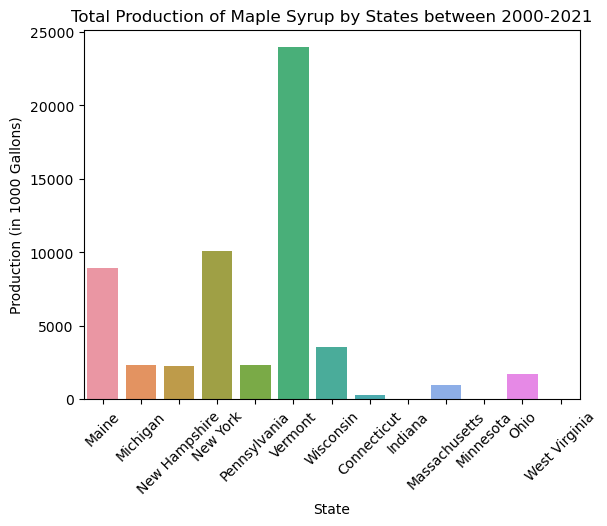

In [23]:
plt.figure()

sns.barplot(x=total_production_by_state.state, y=total_production_by_state.production)
plt.title('Total Production of Maple Syrup by States between 2000-2021')
plt.ylabel('Production (in 1000 Gallons)')
plt.xlabel('State')
plt.xticks(rotation=45)

plt.show()


In [24]:
average_production = []

for state in states:
    average_production.append([state, maple_syrup_data.production[maple_syrup_data.state == state].mean().round(0)])
    
average_production_by_state = pd.DataFrame(average_production, columns=['state', 'avg_production'])

average_production_by_state.sort_values('avg_production', ascending=False)

,state,avg_production
5,Vermont,1089.0
3,New York,460.0
0,Maine,408.0
6,Wisconsin,161.0
4,Pennsylvania,107.0
1,Michigan,105.0
2,New Hampshire,104.0
11,Ohio,90.0
9,Massachusetts,53.0
8,Indiana,15.0


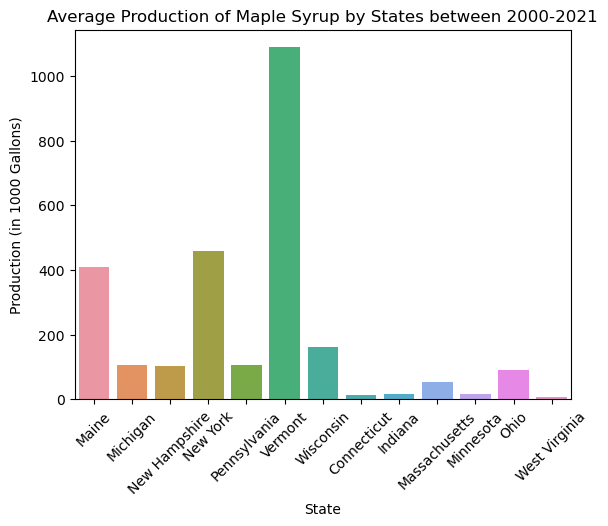

In [25]:
plt.figure()

sns.barplot(x=average_production_by_state.state, y=average_production_by_state.avg_production)
plt.title('Average Production of Maple Syrup by States between 2000-2021')
plt.ylabel('Production (in 1000 Gallons)')
plt.xlabel('State')
plt.xticks(rotation=45)

plt.show()


Vermont is the largest producer by total gallons produced and average produced every year, both by a large margin. Vermont accounts for around 42% of all maple syrup production in the USA between 2000-2021.

New York and Maine produce 38% of the total maple syrup, meaning that these 3 states produce around 80% of all maple syrup in the USA between 2000-2021. This shows that maple syrup in the USA is highly localized with these three states located close to eachother in the north east. 

The maple syrup production in the USA is mostly located in a relatively small geographical area in the north east. This means that the maple syrup industry is more susceptible to natural disasters, pests and diseases. If a major storm came through this area, it would potentially damage 80% of the maple syrup production. Therefore, prices and production could heavily fluctuate as production is influenced by these natural factors.

### Yield per Tap over Time
This section will explore the general trend of yield over time for the production of maple syrup in the USA. It will also compare the general trend of yield per tap to the trend for the 3 major production states (Vermont, New York and Maine). Finally, the growth trend will be used to estimate the yield per tap for the 'big 3' in 2022.

In [26]:
maple_syrup_data.head(20)

,state,num_of_taps,yield_per_tap,production,avg_price,value,retail_price,wholesale_price,bulk_p_price,bulk_g_price,date_open,date_closed,year
0,Maine,1960,0.262,514,38.6,19840,61.4,48.3,3.20,35.1,2021-02-15,2021-04-30,2021
1,Michigan,550,0.273,150,46.3,6945,47.7,37.6,2.40,26.8,2021-02-01,2021-04-14,2021
2,New Hampshire,530,0.240,127,64.9,8242,65.5,48.2,2.40,26.4,2021-01-11,2021-04-16,2021
3,New York,2900,0.223,647,37.8,24457,45.6,41.5,2.40,26.7,2021-01-01,2021-05-04,2021
4,Pennsylvania,745,0.226,168,36.2,6082,41.3,39.8,2.50,27.6,2021-01-04,2021-04-15,2021
5,Vermont,6500,0.269,1750,32.0,56000,46.3,37.9,2.60,28.3,2021-01-25,2021-04-23,2021
6,Wisconsin,900,0.406,365,33.1,12082,45.2,40.7,2.50,27.4,2021-02-20,2021-04-10,2021
7,Maine,1970,0.299,590,34.9,20591,53.0,61.4,2.26,24.9,2020-02-02,2020-05-05,2020
8,Michigan,570,0.298,170,48.6,8262,48.5,47.7,2.00,21.7,2020-02-02,2020-04-25,2020
9,New Hampshire,530,0.291,154,52.1,8023,58.0,65.5,2.05,22.6,2020-01-05,2020-04-28,2020


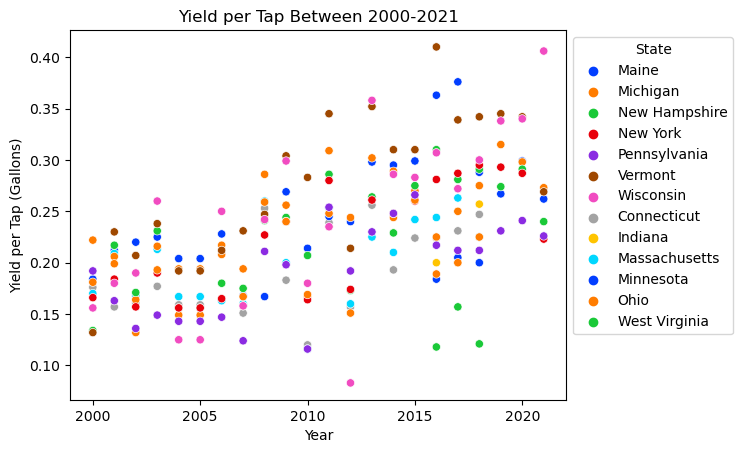

In [27]:
# Create a scatterplot to find general trend

plt.figure()

ax = sns.scatterplot(x=maple_syrup_data.year, y=maple_syrup_data.yield_per_tap, hue=maple_syrup_data.state, palette='bright')
plt.title('Yield per Tap Between 2000-2021')
plt.xlabel('Year')
plt.ylabel('Yield per Tap (Gallons)')
plt.legend(title='State')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

# The graph shows yield per tap for each state and it seems to show a general growth in yield

Text(0, 0.5, 'Yield per Tap (Gallons)')

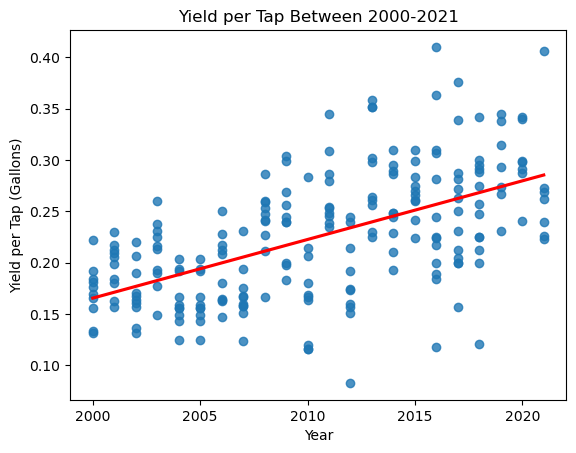

In [28]:
plt.figure()

#sns.scatterplot(x=maple_syrup_data.year, y=maple_syrup_data.yield_per_tap)

sns.regplot(x=maple_syrup_data.year, y=maple_syrup_data.yield_per_tap, line_kws={'color':'red'}, ci=False)
plt.title('Yield per Tap Between 2000-2021')
plt.xlabel('Year')
plt.ylabel('Yield per Tap (Gallons)')

# Trendline clearly shows that yield per tap is increasing over time, showing that taps are becoming more efficient

In [29]:
yield_year_correlation = maple_syrup_data.yield_per_tap.corr(maple_syrup_data.year, method='pearson')

print(yield_year_correlation.round(2))

# Pearson correlation coeffiecent shows that there is a fairly strong positive correlation between year and yield

0.58


Since we know 80% of maple syrup is produced in 3 states, its important to understand yield over time in these states

Correlation between yield and time for Maine is: 0.72
Correlation between yield and time for Vermont is: 0.78
Correlation between yield and time for New York is: 0.79


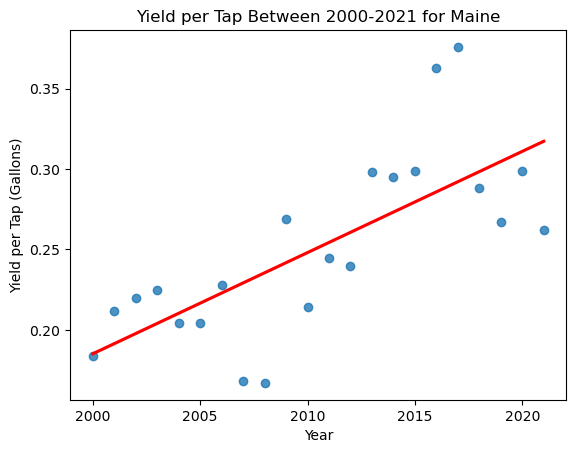

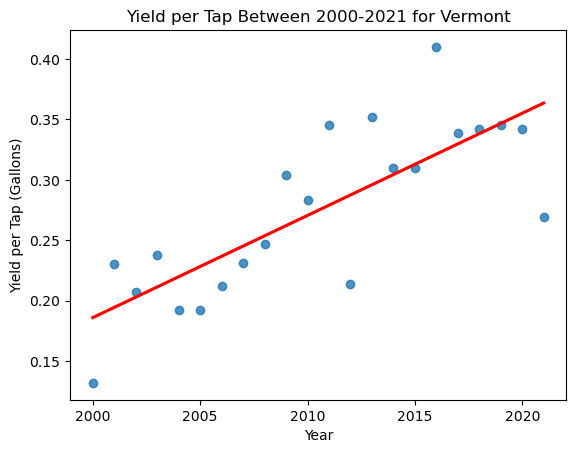

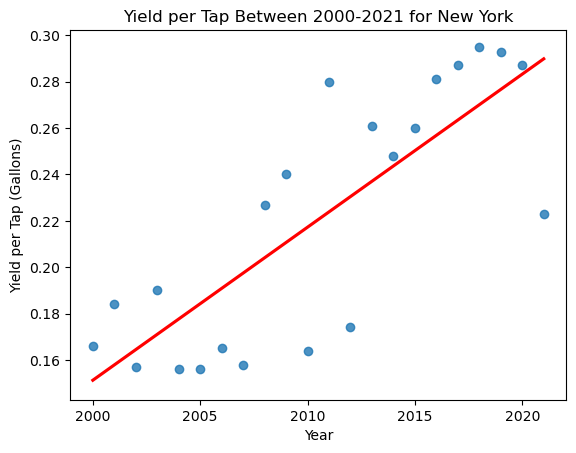

In [30]:
important_states = ['Maine', 'Vermont', 'New York']


for state in important_states:
    plt.figure()

    sns.regplot(x=maple_syrup_data.year[maple_syrup_data.state == state], y=maple_syrup_data.yield_per_tap[maple_syrup_data.state == state], line_kws={'color':'red'}, ci=False)
    plt.title(f'Yield per Tap Between 2000-2021 for {state}')
    plt.xlabel('Year')
    plt.ylabel('Yield per Tap (Gallons)')

    corr = maple_syrup_data.yield_per_tap[maple_syrup_data.state == state].corr(maple_syrup_data.year[maple_syrup_data.state == state], method='pearson')
    
    print(f'Correlation between yield and time for {state} is: {round(corr, 2)}')

The correlation between yield and time is above the national average for the 3 states (0.58 vs 0.72, 0.78, 0.79). This shows a more consistent growth in yields and efficiency in the big 3. The close grouping of the pearson correlation coefficients of these 3 states suggests that 

The reasons for this difference should be further explored and can be a topic for investigation by itself. Possible reasons is that the maple syrup industry is seeing more innovation and investment to increase the yield per tap. The climate and environment in these areas could also be more 'friendly' for growing sugar maples and harvesting maple syrup, leading to fewer poor harvests and ensuring that a good yield is produced more consistently.

As Vermont, New York and Maine have a close grouping of the pearson correlation coefficient between year and yield per tap, along with producing 80% of maple syrup in the USA, we will continue the analysis using only these three states. This is done to reduce the effect of any anomalies, such as other minor production states only producing for a short time period.

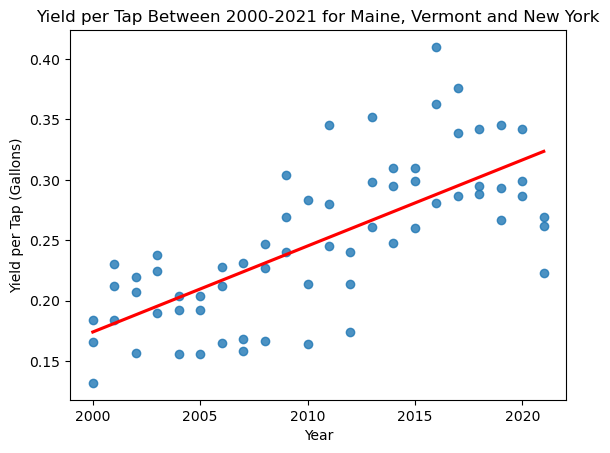

The equation of the trendline is: y=0.0071166948993035975x-14.059251458686248


In [31]:
plt.figure()

sns.regplot(x=maple_syrup_data.year[(maple_syrup_data['state'] == 'Maine') | (maple_syrup_data['state'] == 'Vermont') | (maple_syrup_data['state'] == 'New York')], y=maple_syrup_data.yield_per_tap[(maple_syrup_data['state'] == 'Maine') | (maple_syrup_data['state'] == 'Vermont') | (maple_syrup_data['state'] == 'New York')], line_kws={'color':'red'}, ci=False)
plt.title(f'Yield per Tap Between 2000-2021 for Maine, Vermont and New York')
plt.xlabel('Year')
plt.ylabel('Yield per Tap (Gallons)')

plt.show()


slope, intercept, r_value, p_value, std_err = stats.linregress(maple_syrup_data.year[(maple_syrup_data['state'] == 'Maine') | (maple_syrup_data['state'] == 'Vermont') | (maple_syrup_data['state'] == 'New York')], maple_syrup_data.yield_per_tap[(maple_syrup_data['state'] == 'Maine') | (maple_syrup_data['state'] == 'Vermont') | (maple_syrup_data['state'] == 'New York')])

print(f'The equation of the trendline is: y={slope}x{intercept}')

In [32]:
# Using the equation of the trendline, insert 2022 as the x value to estimate the yield per tap

estimated_2022_yield_per_tap = round(slope * 2022 + intercept, 2)

print(f'Estimated Yield per Tap in 2022: {estimated_2022_yield_per_tap} Gallons per Tap')

Estimated Yield per Tap in 2022: 0.33 Gallons per Tap


According to the USDA report for 2022, the average yield per tap in the USA in 2022 was 0.35 gallons per tap. The predicted yield is roughly 6% off the real yield.

Source: http://northamericanmaple.org/wp-content/uploads/2022/12/Maple_Crop_2022.pdf

### Average Price over Time
This section will find the trend in price over time and use it to estimate what the price will be in 2022. This price will be used with the estimated yield per tap for 2022 to find the expected value per tap in 2022.

This analysis does not take into account inflation.

In [33]:
maple_syrup_data.head(20)

,state,num_of_taps,yield_per_tap,production,avg_price,value,retail_price,wholesale_price,bulk_p_price,bulk_g_price,date_open,date_closed,year
0,Maine,1960,0.262,514,38.6,19840,61.4,48.3,3.20,35.1,2021-02-15,2021-04-30,2021
1,Michigan,550,0.273,150,46.3,6945,47.7,37.6,2.40,26.8,2021-02-01,2021-04-14,2021
2,New Hampshire,530,0.240,127,64.9,8242,65.5,48.2,2.40,26.4,2021-01-11,2021-04-16,2021
3,New York,2900,0.223,647,37.8,24457,45.6,41.5,2.40,26.7,2021-01-01,2021-05-04,2021
4,Pennsylvania,745,0.226,168,36.2,6082,41.3,39.8,2.50,27.6,2021-01-04,2021-04-15,2021
5,Vermont,6500,0.269,1750,32.0,56000,46.3,37.9,2.60,28.3,2021-01-25,2021-04-23,2021
6,Wisconsin,900,0.406,365,33.1,12082,45.2,40.7,2.50,27.4,2021-02-20,2021-04-10,2021
7,Maine,1970,0.299,590,34.9,20591,53.0,61.4,2.26,24.9,2020-02-02,2020-05-05,2020
8,Michigan,570,0.298,170,48.6,8262,48.5,47.7,2.00,21.7,2020-02-02,2020-04-25,2020
9,New Hampshire,530,0.291,154,52.1,8023,58.0,65.5,2.05,22.6,2020-01-05,2020-04-28,2020


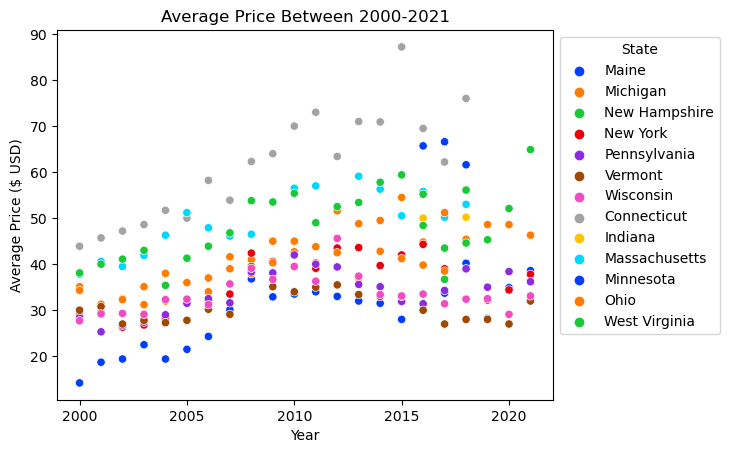

In [34]:
plt.figure()

ax = sns.scatterplot(x=maple_syrup_data.year, y=maple_syrup_data.avg_price, hue=maple_syrup_data.state, palette='bright')
plt.title('Average Price Between 2000-2021')
plt.xlabel('Year')
plt.ylabel('Average Price ($ USD)')
plt.legend(title='State')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

# Exploring the figure visually, we can see a tight spread between 2000-2005 and then a gradual increase in spread between 2005-2015
# Between 2010-2020 the spread has increased significantly
# Another surprise is that Connecticut consistently has the most expensive wholesale price

Correlation between price and time for Maine is: 0.79
Correlation between price and time for Vermont is: 0.04
Correlation between price and time for New York is: 0.55


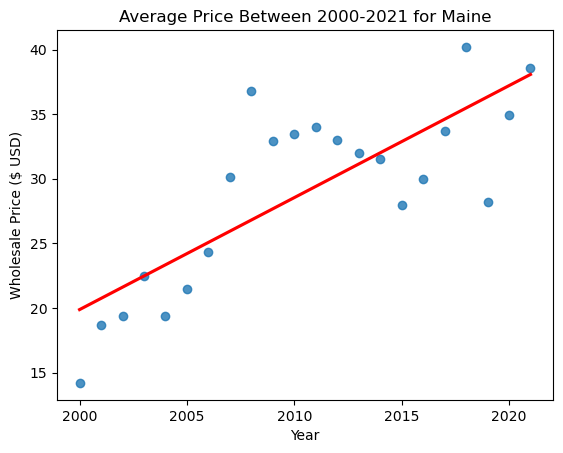

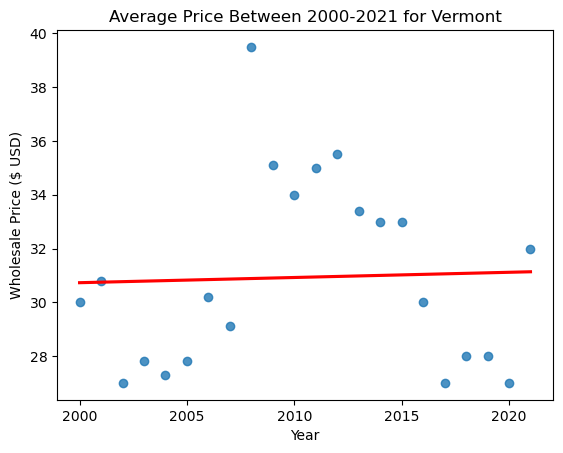

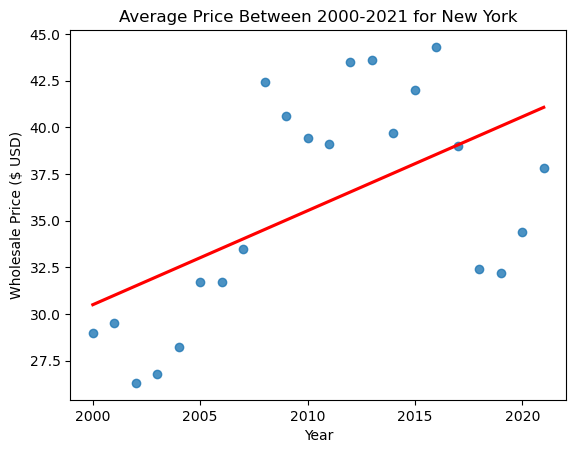

In [35]:
# Isolating the average price trend for the big 3 states

for state in important_states:
    plt.figure()

    sns.regplot(x=maple_syrup_data.year[maple_syrup_data.state == state], y=maple_syrup_data.avg_price[maple_syrup_data.state == state], line_kws={'color':'red'}, ci=False)
    plt.title(f'Average Price Between 2000-2021 for {state}')
    plt.xlabel('Year')
    plt.ylabel('Wholesale Price ($ USD)')
    
    corr = maple_syrup_data.avg_price[maple_syrup_data.state == state].corr(maple_syrup_data.year[maple_syrup_data.state == state], method='pearson')
    
    print(f'Correlation between price and time for {state} is: {round(corr, 2)}')
    
# There is a mix of correlations between price over time between the big 3 states
# This highlights the volatility of maple syrup prices and highlights that any final prediction for average price will still be uncertain

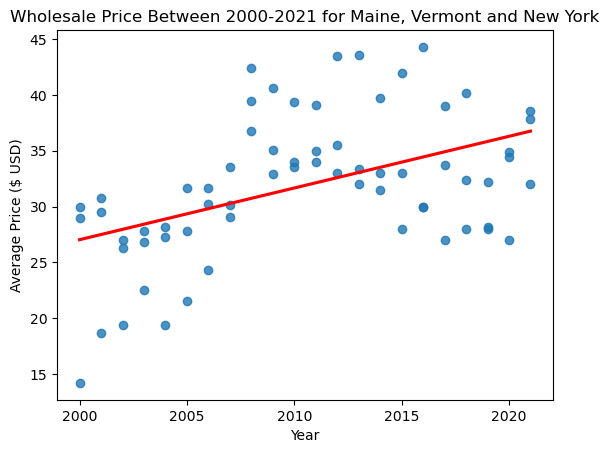

In [36]:
plt.figure()

sns.regplot(x=maple_syrup_data.year[(maple_syrup_data['state'] == 'Maine') | (maple_syrup_data['state'] == 'Vermont') | (maple_syrup_data['state'] == 'New York')], y=maple_syrup_data.avg_price[(maple_syrup_data['state'] == 'Maine') | (maple_syrup_data['state'] == 'Vermont') | (maple_syrup_data['state'] == 'New York')], line_kws={'color':'red'}, ci=False)
plt.title(f'Wholesale Price Between 2000-2021 for Maine, Vermont and New York')
plt.xlabel('Year')
plt.ylabel('Average Price ($ USD)')

plt.show()

In [37]:
maple_syrup_data = maple_syrup_data.dropna()

slope, intercept, r_value, p_value, std_err = stats.linregress(maple_syrup_data.year[(maple_syrup_data['state'] == 'Maine') | (maple_syrup_data['state'] == 'Vermont') | (maple_syrup_data['state'] == 'New York')], maple_syrup_data.avg_price[(maple_syrup_data['state'] == 'Maine') | (maple_syrup_data['state'] == 'Vermont') | (maple_syrup_data['state'] == 'New York')])


estimated_2022_average_price = round(slope * 2022 + intercept, 2)

print(f'Estimated Average Price in 2022: {estimated_2022_average_price} USD')

Estimated Average Price in 2022: 32.22 USD


According to the USDA report for 2022, the average price per gallon in the USA in 2022 was $34.70. The predicted average price is roughly 8% within the actual average price.

Source: https://www.uvm.edu/sites/default/files/Agriculture/maple/2023.pdf

In [38]:
estimated_value_per_tap_2022 = round(estimated_2022_yield_per_tap * estimated_2022_average_price, 2)


print(f'The estimated value per tap in 2022 is: ${estimated_value_per_tap_2022} USD')

The estimated value per tap in 2022 is: $10.63 USD
